<ipython-input-1-df2364fc15ff>:8: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(pi,qr[1])
<ipython-input-1-df2364fc15ff>:12: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(π/2+λ) (1 pulse on hardware).
  qc.u2((pi/4),pi,qr[2])


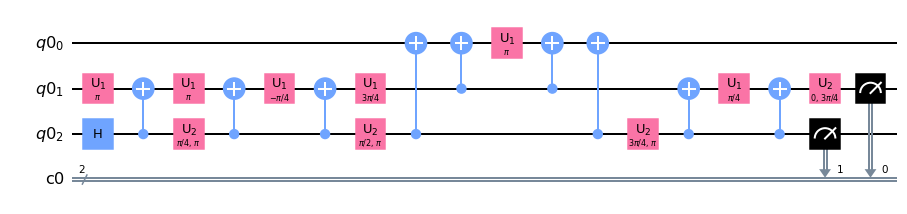

In [1]:
from qiskit import *
from math import pi
phi=pi/2
qr=QuantumRegister(3)
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr,cr)
%matplotlib inline
qc.u1(pi,qr[1])
qc.h(qr[2])
qc.cx(qr[2],qr[1])
qc.u1(pi,qr[1])
qc.u2((pi/4),pi,qr[2])
qc.cx(qr[2],qr[1])
qc.u1(-pi/4, qr[1])
qc.cx(qr[2],qr[1])
qc.u1((pi/4)+phi,qr[1]) #phi

qc.u2(phi, 2*phi, qr[2]) #phase
qc.cx(qr[2], qr[0])
qc.cx(qr[1], qr[0])
qc.u1(2*phi,qr[0])   #phase
qc.cx(qr[1],qr[0])
qc.cx(qr[2],qr[0])
qc.u2(3*pi/4,pi,qr[2])
qc.cx(qr[2],qr[1])
qc.u1(pi/4, qr[1])
qc.cx(qr[2],qr[1])
qc.u2(0,3*pi/4,qr[1])
qc.measure(qr[1],cr[0])
qc.measure(qr[2],cr[1])


sim=Aer.get_backend('qasm_simulator')
execute(qc,backend=sim)
Result=execute(qc, backend=sim).result()
from qiskit.tools.visualization import plot_histogram


qc.draw(output= 'mpl')

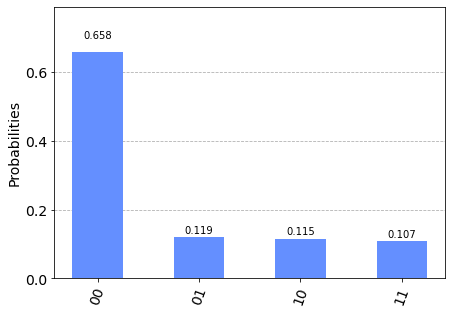

In [2]:
plot_histogram(Result.get_counts(qc))